## We want to use a decision tree classifier to predict which continent a flag might come from

In [126]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as treee

In [127]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv(r"C:\Users\yousi\Documents\GitHub\Portfolio\Data Science\Regular Projects\Supervised-Learning-RCT\Find the Flag (Decision Tree)\flag.data.txt", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']
print(len(var))

17


In [128]:
#Calculate the count of flags by landmass value
print(df["landmass"].value_counts())

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64


In [129]:
#Let's just look at flags from Europe and Oceania. 

df2 = df[df['landmass'].isin([3,6])]
labels = df2["landmass"]

print(df2.head())

              name  landmass  zone  area  population  language  religion  \
1          Albania         3     1    29           3         6         6   
3   American-Samoa         6     3     0           0         1         1   
4          Andorra         3     1     0           0         6         0   
10       Australia         6     2  7690          15         1         1   
11         Austria         3     1    84           8         4         0   

    bars  stripes  colours  ...  saltires  quarters  sunstars  crescent  \
1      0        0        3  ...         0         0         1         0   
3      0        0        5  ...         0         0         0         0   
4      3        0        3  ...         0         0         0         0   
10     0        0        3  ...         1         1         6         0   
11     0        3        2  ...         0         0         0         0   

    triangle  icon  animate text  topleft  botright  
1          0     0        1    0      

In [130]:
#Print the average values of each of the predictosr in our predictor list for both continents. 
print(np.mean(df2[df2["landmass"] == 3][var]))

print(np.mean(df2[df2["landmass"] == 6][var]))

red         0.828571
green       0.200000
blue        0.514286
gold        0.428571
white       0.771429
black       0.171429
orange      0.057143
bars        0.628571
stripes     1.285714
circles     0.028571
crosses     0.285714
saltires    0.028571
quarters    0.028571
sunstars    0.142857
triangle    0.028571
animate     0.114286
dtype: float64
red         0.80
green       0.20
blue        0.80
gold        0.60
white       0.95
black       0.15
orange      0.15
bars        0.00
stripes     0.40
circles     0.15
crosses     0.40
saltires    0.30
quarters    0.40
sunstars    3.30
triangle    0.25
animate     0.30
dtype: float64


C:\Users\yousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\yousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\yousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qb

In [131]:
print(df2.groupby('landmass')[var].mean())

               red  green      blue      gold     white     black    orange  \
landmass                                                                      
3         0.828571    0.2  0.514286  0.428571  0.771429  0.171429  0.057143   
6         0.800000    0.2  0.800000  0.600000  0.950000  0.150000  0.150000   

              bars   stripes   circles   crosses  saltires  quarters  \
landmass                                                               
3         0.628571  1.285714  0.028571  0.285714  0.028571  0.028571   
6         0.000000  0.400000  0.150000  0.400000  0.300000  0.400000   

          sunstars  triangle   animate  
landmass                                
3         0.142857  0.028571  0.114286  
6         3.300000  0.250000  0.300000  


C:\Users\yousi\AppData\Local\Temp\ipykernel_18908\3719349864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df2.groupby('landmass')[var].mean())


In [132]:
#Inspecting variable types for each predictor
print(df2[var].dtypes)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [133]:
#MainHue is not a 64 bit int. 
print(df2["mainhue"].value_counts())

data = pd.get_dummies(df2[var])

print(data.head())

red      23
blue     14
white    10
gold      5
black     2
green     1
Name: mainhue, dtype: int64
    red  green  blue  gold  white  black  orange  bars  stripes  circles  ...  \
1     1      0     0     1      0      1       0     0        0        0  ...   
3     1      0     1     1      1      0       1     0        0        0  ...   
4     1      0     1     1      0      0       0     3        0        0  ...   
10    1      0     1     0      1      0       0     0        0        0  ...   
11    1      0     0     0      1      0       0     0        3        0  ...   

    quarters  sunstars  triangle  animate  mainhue_black  mainhue_blue  \
1          0         1         0        1              0             0   
3          0         0         1        1              0             1   
4          0         0         0        0              0             0   
10         1         6         0        0              0             1   
11         0         0         0        0  

In [134]:
#splitting our data into a test and train set

X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1)

[[1, 0.7857142857142857], [2, 0.7857142857142857], [3, 0.7857142857142857], [4, 0.7857142857142857], [5, 0.6428571428571429], [6, 0.7857142857142857], [7, 0.6428571428571429], [8, 0.7142857142857143], [9, 0.7142857142857143], [10, 0.7142857142857143], [11, 0.7142857142857143], [12, 0.7142857142857143], [13, 0.7142857142857143], [14, 0.7142857142857143], [15, 0.7142857142857143], [16, 0.7142857142857143], [17, 0.7142857142857143], [18, 0.7142857142857143], [19, 0.7142857142857143], [20, 0.7142857142857143]]


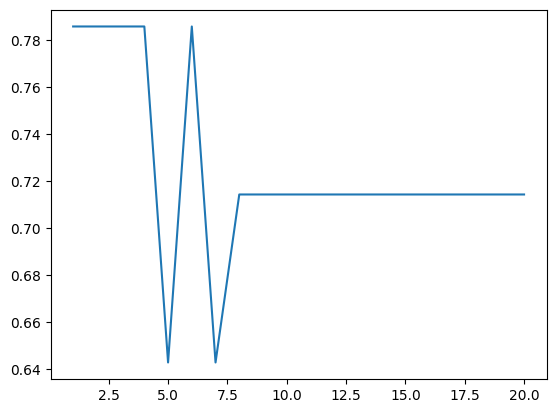

In [135]:
#Let's try a range of decision tree max depth values and see which ones from 1-20 are best. 

acc_depth_labeled = []
acc_depth = []
for x  in list(range(1,21)):
    tree = DecisionTreeClassifier(random_state=10, max_depth = x)
    tree.fit(X_train,y_train)
    acc_depth_labeled.append([x,tree.score(X_test,y_test)])
    acc_depth.append(tree.score(X_test,y_test))

print(acc_depth_labeled)
plt.plot(list(range(1,21)), acc_depth)

plt.show()


In [136]:
#Find the largest accuracy and the depth at which that occurs.

print(np.max(acc_depth))

for x in acc_depth_labeled:
    if np.max(acc_depth) in x: 
        print(x[0])

0.7857142857142857
1
2
3
4
6


In [137]:
#So we get a max accuracy with depths of 1,2,3,4 and 6. 6 is too high, might overfit, 1,2 and 3 are a bit too low. Let's choose a depth of 4. 

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))

0.7142857142857143


[Text(0.6, 0.9, 'sunstars <= 3.0\ngini = 0.414\nsamples = 41\nvalue = [29, 12]\nclass = Europe'),
 Text(0.5, 0.7, 'mainhue_blue <= 0.5\ngini = 0.313\nsamples = 36\nvalue = [29, 7]\nclass = Europe'),
 Text(0.3, 0.5, 'circles <= 0.5\ngini = 0.18\nsamples = 30\nvalue = [27, 3]\nclass = Europe'),
 Text(0.2, 0.3, 'triangle <= 0.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]\nclass = Europe'),
 Text(0.1, 0.1, 'gini = 0.071\nsamples = 27\nvalue = [26, 1]\nclass = Europe'),
 Text(0.3, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Europe'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Oceania'),
 Text(0.7, 0.5, 'crosses <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Oceania'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Oceania'),
 Text(0.8, 0.3, 'quarters <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Europe'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Europe'),
 Text(0.9, 0.1, 'gini = 0.0\nsamp

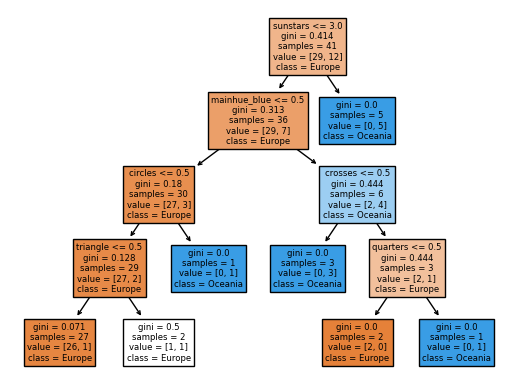

In [138]:
treee.plot_tree(dt, feature_names = X_test.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)

In [139]:
#Let's tune the tree by looping through a bunch of cost complexity pruning values. 

ccp = np.logspace(-3, 0, num=20)
D4_acc_ccp = []
for i in ccp:
    dt = DecisionTreeClassifier(max_depth=4, ccp_alpha= i)
    dt.fit(X_train, y_train)
    D4_acc_ccp.append(dt.score(X_test,y_test))
print(D4_acc_ccp)


[0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.6428571428571429, 0.7142857142857143, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


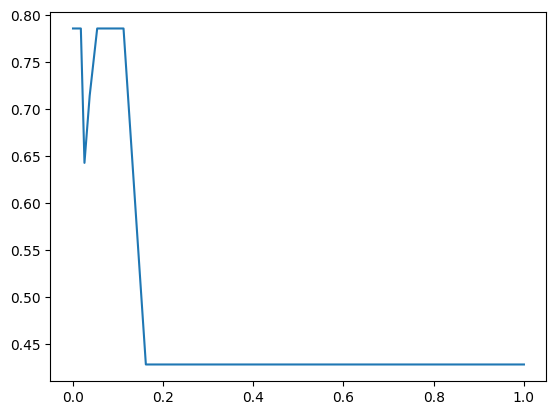

0.018329807108324356


In [144]:
plt.plot(ccp, D4_acc_ccp)

plt.show()

print(ccp[8])

0.7857142857142857


[Text(0.6666666666666666, 0.9, 'sunstars <= 3.0\ngini = 0.414\nsamples = 41\nvalue = [29, 12]\nclass = Europe'),
 Text(0.5555555555555556, 0.7, 'mainhue_blue <= 0.5\ngini = 0.313\nsamples = 36\nvalue = [29, 7]\nclass = Europe'),
 Text(0.3333333333333333, 0.5, 'circles <= 0.5\ngini = 0.18\nsamples = 30\nvalue = [27, 3]\nclass = Europe'),
 Text(0.2222222222222222, 0.3, 'triangle <= 0.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]\nclass = Europe'),
 Text(0.1111111111111111, 0.1, 'gini = 0.071\nsamples = 27\nvalue = [26, 1]\nclass = Europe'),
 Text(0.3333333333333333, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Europe'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Oceania'),
 Text(0.7777777777777778, 0.5, 'animate <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Oceania'),
 Text(0.6666666666666666, 0.3, 'crosses <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Europe'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples 

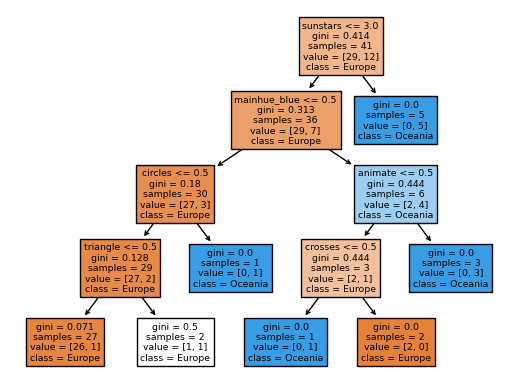

In [145]:
#we found the ideal ccp and ideal depth, let's use both
dt = DecisionTreeClassifier(max_depth=4, ccp_alpha=0.018329807108324356)
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
treee.plot_tree(dt, feature_names = X_test.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)